## Dependencies

In [43]:
!pip install gradio --user --no-warn-script-location

In [1]:
import mediapipe as mp
import cv2 
import numpy as np

## OpenCV Feed

In [2]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow("segmentation", frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Selfie Segmentation

In [2]:
mp_selfie = mp.solutions.selfie_segmentation

In [3]:
cap = cv2.VideoCapture('Selfie.mp4')
with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # frame resize
        frame = cv2.resize(frame, (1280,720))
        
        # Applying segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True
        
        cv2.imshow("segmentation", frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [4]:
res.segmentation_mask

array([[7.6227640e-31, 7.6227640e-31, 7.6227640e-31, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1755667e-25, 1.1755667e-25, 1.1755667e-25, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3714863e-24, 1.3714863e-24, 1.3714863e-24, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.9227738e-17, 4.9227738e-17, 4.9227738e-17, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [7.7869327e-17, 7.7869327e-17, 7.7869327e-17, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [8.0554481e-17, 8.0554481e-17, 8.0554481e-17, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [5]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


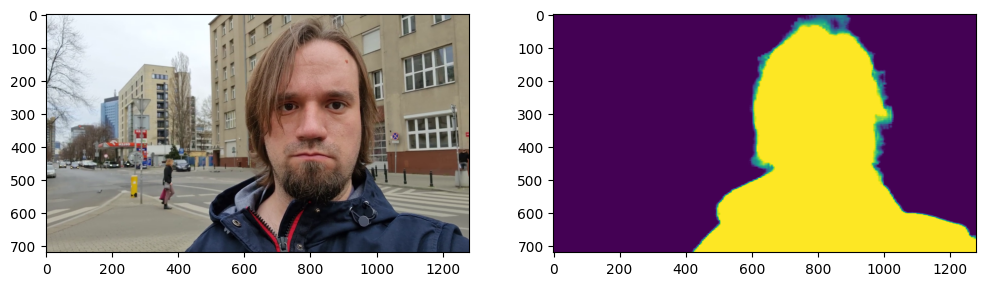

In [6]:
plt.figure(figsize=(12,12))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask);

In [7]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5

In [8]:
segmentated_image = np.where(mask, frame, background)

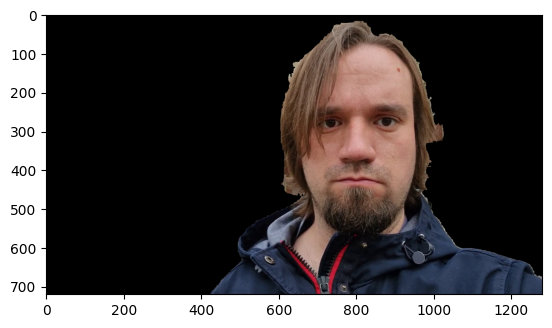

In [9]:
plt.imshow(segmentated_image);

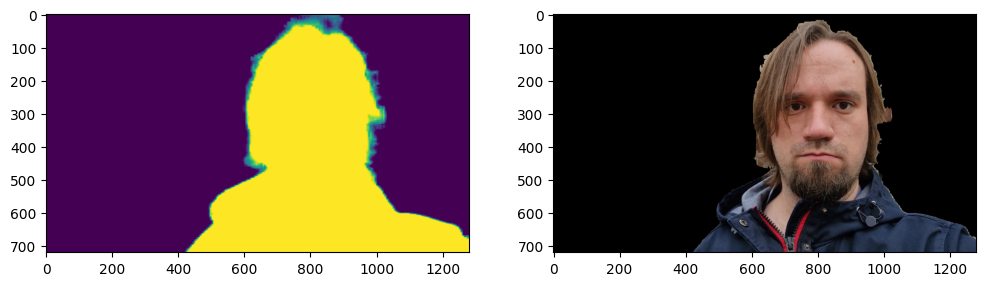

In [10]:
plt.figure(figsize=(12,12))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmentated_image);

In [11]:
segmentated_image = np.where(mask, frame, cv2.blur(frame, (40,40)))

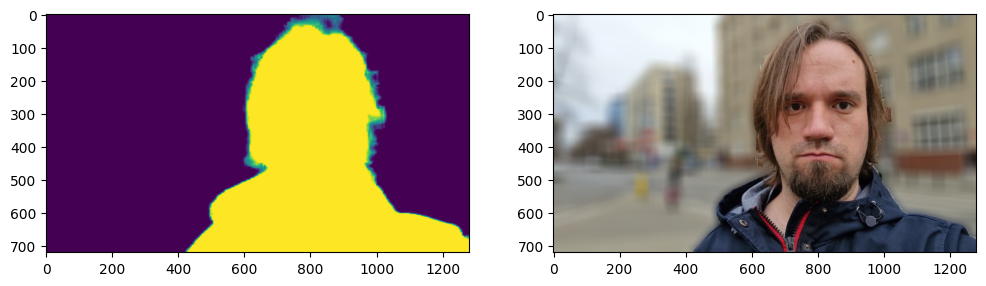

In [12]:
plt.figure(figsize=(12,12))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmentated_image);

## Gradio App

In [13]:
import gradio as gr

In [30]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [36]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

C:\Users\shrut\AppData\Roaming\Python\Python37\site-packages\gradio\inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
C:\Users\shrut\AppData\Roaming\Python\Python37\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
# webapp.launch()